In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-mens-cricket-matches-data-2008-2023/match_data.csv
/kaggle/input/ipl-mens-cricket-matches-data-2008-2023/match_info_data.csv


Let's see the data.

In [2]:
match_data_df = pd.read_csv("/kaggle/input/ipl-mens-cricket-matches-data-2008-2023/match_data.csv",low_memory=False)
match_data_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,335982
243813,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243814,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243815,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982


In [3]:
match_info_data = pd.read_csv("/kaggle/input/ipl-mens-cricket-matches-data-2008-2023/match_info_data.csv")
match_info_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin


Here, we have two dataframes.

First, we have the ball by ball data for every IPL match played between 2008-2023.

Second, we have all the information about the IPL matches.

We will do the analysis on the "match_info_data" dataframe which contains the information about the IPL matches.

In [4]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


Let's see the total number of matches played between 2008-2023.

In [5]:
len(match_info_data)

1024

There were 1024 IPL matches played between 2008 to 2023.

Let's see the seaseon wise matches played.

In [6]:
print("Columns are :",list(match_info_data.columns))

Columns are : ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


In [7]:
import pandas as pd

# Assuming match_info_data is your DataFrame
sorted_season_counts = match_info_data["season"].value_counts().reset_index().sort_values(by='season')

sorted_season_counts


,season,count
14,2007/08,58
15,2009,57
11,2009/10,60
4,2011,73
3,2012,74
0,2013,76
10,2014,60
13,2015,59
9,2016,60
12,2017,59


## (1) DATASET 1 ANALYSIS : IPL ALL MATCHES OVERVIEW

### [A] General Overview:


How many matches are there in the dataset?

In [8]:
print("Total Number of matches played are :",len(match_info_data))

Total Number of matches played are : 1024


How many unique seasons are represented in the dataset?

In [9]:
print("Total number of unique seasons are :",len(list(match_info_data["season"].unique())))

Total number of unique seasons are : 16


What are the different cities where matches have been played?

In [10]:
print("Different cities where IPL matches were played :",list(match_info_data["city"].unique()))

Different cities where IPL matches were played : ['Ahmedabad', 'Chennai', 'Mumbai', 'Bengaluru', 'Kolkata', 'Delhi', 'Dharamsala', 'Hyderabad', 'Lucknow', 'Jaipur', 'Chandigarh', 'Guwahati', 'Navi Mumbai', 'Pune', 'Dubai', 'Sharjah', 'Abu Dhabi', nan, 'Visakhapatnam', 'Indore', 'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town']


In [11]:
print("Total number of cities where IPL matches were played :",len(list(match_info_data["city"].unique())))

Total number of cities where IPL matches were played : 36


What are the unique venues where matches have taken place?

In [12]:
print("Venues for IPL matches : \n ")
print("-"*100)

all_venues_with_serial = [print(f"{i}. {venue}") for i, venue in enumerate(match_info_data["venue"].unique(),1)]

Venues for IPL matches : 
 
----------------------------------------------------------------------------------------------------
1. Narendra Modi Stadium, Ahmedabad
2. MA Chidambaram Stadium, Chepauk, Chennai
3. Wankhede Stadium, Mumbai
4. M Chinnaswamy Stadium, Bengaluru
5. Eden Gardens, Kolkata
6. Arun Jaitley Stadium, Delhi
7. Himachal Pradesh Cricket Association Stadium, Dharamsala
8. Rajiv Gandhi International Stadium, Uppal, Hyderabad
9. Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow
10. Sawai Mansingh Stadium, Jaipur
11. Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh
12. Barsapara Cricket Stadium, Guwahati
13. Brabourne Stadium, Mumbai
14. Dr DY Patil Sports Academy, Mumbai
15. Maharashtra Cricket Association Stadium, Pune
16. Dubai International Cricket Stadium
17. Sharjah Cricket Stadium
18. Zayed Cricket Stadium, Abu Dhabi
19. Sheikh Zayed Stadium
20. Rajiv Gandhi International Stadium
21. Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St

What are the total number of teams participating in the dataset?

In [13]:
all_teams = list(set(list(match_info_data["team1"].unique()) + list(match_info_data["team2"].unique())))

In [14]:
print("All IPL Teams  : \n ")
print("-"*100)

printing_ipl_teams = [print(f"{i}. {team}") for i, team in enumerate(all_teams,1)]

All IPL Teams  : 
 
----------------------------------------------------------------------------------------------------
1. Deccan Chargers
2. Punjab Kings
3. Rajasthan Royals
4. Kolkata Knight Riders
5. Lucknow Super Giants
6. Kings XI Punjab
7. Rising Pune Supergiant
8. Delhi Capitals
9. Sunrisers Hyderabad
10. Royal Challengers Bangalore
11. Gujarat Lions
12. Pune Warriors
13. Kochi Tuskers Kerala
14. Delhi Daredevils
15. Mumbai Indians
16. Gujarat Titans
17. Rising Pune Supergiants
18. Chennai Super Kings


How many matches have resulted in a tie?

In [15]:
nan_matches = match_info_data[match_info_data["winner"].isna()]
print("Total number of tied matches :", len(nan_matches))
print("-"*100)
print("Matches where 'winner' column has NaN values:")
nan_matches


Total number of tied matches : 19
----------------------------------------------------------------------------------------------------
Matches where 'winner' column has NaN values:


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
29,1359519,2023,Lucknow,2023/05/03,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,normal,0,NaN,0,0,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,AK Chaudhary,NA Patwardhan,CB Gaffaney
189,1254077,2021,Chennai,2021/04/25,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,NaN,0,0,PP Shaw,"MA Chidambaram Stadium, Chepauk, Chennai",CB Gaffaney,KN Ananthapadmanabhan,Tapan Sharma
232,1216517,2020/21,NaN,2020/10/18,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,NaN,0,0,KL Rahul,Dubai International Cricket Stadium,Nitin Menon,PR Reiffel,AK Chaudhary
233,1216512,2020/21,Abu Dhabi,2020/10/18,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,NaN,0,0,LH Ferguson,Sheikh Zayed Stadium,PG Pathak,S Ravi,VK Sharma
258,1216547,2020/21,NaN,2020/09/28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,NaN,0,0,AB de Villiers,Dubai International Cricket Stadium,Nitin Menon,PR Reiffel,AK Chaudhary
266,1216493,2020/21,NaN,2020/09/20,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,NaN,0,0,MP Stoinis,Dubai International Cricket Stadium,AK Chaudhary,Nitin Menon,PR Reiffel
277,1178426,2019,Mumbai,2019/05/02,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,NaN,0,0,JJ Bumrah,Wankhede Stadium,CK Nandan,S Ravi,A Nand Kishore
279,1178424,2019,Bengaluru,2019/04/30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,NaN,0,0,NaN,M.Chinnaswamy Stadium,NJ Llong,UV Gandhe,AK Chaudhary
318,1175365,2019,Delhi,2019/03/30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,normal,0,NaN,0,0,PP Shaw,Arun Jaitley Stadium,AY Dandekar,Nitin Menon,M Erasmus
413,1082625,2017,Rajkot,2017/04/29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,normal,0,NaN,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,A Nand Kishore


### [B] Team Performance:

Which team has won the most matches overall?

In [16]:
match_info_data["winner"].value_counts().reset_index()

,winner,count
0,Mumbai Indians,138
1,Chennai Super Kings,131
2,Kolkata Knight Riders,119
3,Royal Challengers Bangalore,114
4,Rajasthan Royals,101
5,Kings XI Punjab,85
6,Sunrisers Hyderabad,78
7,Delhi Daredevils,67
8,Delhi Capitals,38
9,Deccan Chargers,29


From above information, it can be said that Mumbai Indians have won most matches.

Which team has won the most matches in each season?

In [17]:
season_winner_counts = match_info_data.groupby(['season', 'winner']).size().reset_index(name='wins')
season_winner_counts


,season,winner,wins
0,2007/08,Chennai Super Kings,9
1,2007/08,Deccan Chargers,2
2,2007/08,Delhi Daredevils,7
3,2007/08,Kings XI Punjab,10
4,2007/08,Kolkata Knight Riders,6
...,...,...,...
131,2023,Mumbai Indians,9
132,2023,Punjab Kings,6
133,2023,Rajasthan Royals,7
134,2023,Royal Challengers Bangalore,7


In [18]:
# Find the index of the maximum wins for each season
idx = season_winner_counts.groupby('season')['wins'].transform(max) == season_winner_counts['wins']


/tmp/ipykernel_19/4253911799.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = season_winner_counts.groupby('season')['wins'].transform(max) == season_winner_counts['wins']


In [19]:
# Filter out the rows with maximum wins for each season
most_wins_per_season = season_winner_counts[idx]
most_wins_per_season

,season,winner,wins
6,2007/08,Rajasthan Royals,13
10,2009,Delhi Daredevils,10
21,2009/10,Mumbai Indians,11
24,2011,Chennai Super Kings,11
38,2012,Kolkata Knight Riders,12
47,2013,Mumbai Indians,13
54,2014,Kings XI Punjab,12
60,2015,Chennai Super Kings,10
64,2015,Mumbai Indians,10
75,2016,Sunrisers Hyderabad,11


Which team has won the most matches when batting first/batting second?

In [20]:
# Filter out matches where result is not 'normal' (i.e., disregard matches with no result)
normal_matches = match_info_data[match_info_data['result'] == 'normal']

# Count matches won by each team when batting first
batting_first_wins = normal_matches[normal_matches['win_by_runs'] > 0]['winner'].value_counts()

# Count matches won by each team when batting second
batting_second_wins = normal_matches[normal_matches['win_by_wickets'] > 0]['winner'].value_counts()

# Print the team that won the most matches when batting first
print("Team with most wins when batting first:")
print(batting_first_wins.idxmax())

# Print the team that won the most matches when batting second
print("Team with most wins when batting second:")
print(batting_second_wins.idxmax())

Team with most wins when batting first:
Mumbai Indians
Team with most wins when batting second:
Mumbai Indians


Which team has won the most matches by runs/wickets?

In [21]:
# Filter out matches where result is not 'normal' (i.e., disregard matches with no result)
normal_matches = match_info_data[match_info_data['result'] == 'normal']

# Count matches won by each team by runs
runs_wins = normal_matches[normal_matches['win_by_runs'] > 0]['winner'].value_counts()

# Count matches won by each team by wickets
wickets_wins = normal_matches[normal_matches['win_by_wickets'] > 0]['winner'].value_counts()

# Print the team that won the most matches by runs
print("Team with most wins by runs:")
print(runs_wins.idxmax())

# Print the team that won the most matches by wickets
print("Team with most wins by wickets:")
print(wickets_wins.idxmax())

Team with most wins by runs:
Mumbai Indians
Team with most wins by wickets:
Mumbai Indians


How does the performance of each team vary across seasons?

In [22]:
# Filter out matches where result is not 'normal' (i.e., disregard matches with no result)
normal_matches = match_info_data[match_info_data['result'] == 'normal']

# Group by season and team, count the matches won by each team in each season
season_team_wins = normal_matches.groupby(['season', 'winner']).size().reset_index(name='wins')

# Group by season, count the total matches played in each season
season_total_matches = normal_matches.groupby('season').size().reset_index(name='total_matches')

# Merge the two DataFrames to calculate win percentage
season_performance = pd.merge(season_team_wins, season_total_matches, on='season')

# Calculate win percentage for each team in each season
season_performance['win_percentage'] = (season_performance['wins'] / season_performance['total_matches']) * 100

# Pivot the DataFrame to have teams as columns and seasons as rows
season_performance_pivot = season_performance.pivot(index='season', columns='winner', values='win_percentage')

season_performance_pivot

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,,,,
2007/08,14.285714,3.571429,NaN,12.500000,NaN,NaN,16.071429,NaN,10.714286,NaN,12.500000,NaN,NaN,23.214286,NaN,NaN,7.142857,NaN
2009,12.962963,16.666667,NaN,16.666667,NaN,NaN,12.962963,NaN,3.703704,NaN,9.259259,NaN,NaN,9.259259,NaN,NaN,16.666667,NaN
2009/10,15.000000,13.333333,NaN,11.666667,NaN,NaN,5.000000,NaN,11.666667,NaN,18.333333,NaN,NaN,10.000000,NaN,NaN,13.333333,NaN
2011,15.714286,8.571429,NaN,5.714286,NaN,NaN,10.000000,7.142857,10.000000,NaN,14.285714,5.714286,NaN,8.571429,NaN,NaN,12.857143,NaN
2012,13.513514,5.405405,NaN,14.864865,NaN,NaN,10.810811,NaN,16.216216,NaN,13.513514,5.405405,NaN,9.459459,NaN,NaN,10.810811,NaN
2013,15.789474,NaN,NaN,3.947368,NaN,NaN,10.526316,NaN,7.894737,NaN,17.105263,5.263158,NaN,14.473684,NaN,NaN,10.526316,11.842105
2014,16.949153,NaN,NaN,3.389831,NaN,NaN,20.338983,NaN,18.644068,NaN,11.864407,NaN,NaN,10.169492,NaN,NaN,8.474576,8.474576
2015,17.543860,NaN,NaN,8.771930,NaN,NaN,3.508772,NaN,12.280702,NaN,17.543860,NaN,NaN,12.280702,NaN,NaN,12.280702,10.526316
2016,NaN,NaN,NaN,12.500000,16.071429,NaN,7.142857,NaN,12.500000,NaN,12.500000,NaN,NaN,NaN,NaN,5.357143,14.285714,19.642857


What is the win percentage of each team?

In [23]:
# Filter out matches where result is not 'normal' (i.e., disregard matches with no result)
normal_matches = match_info_data[match_info_data['result'] == 'normal']

# Count matches won by each team
team_wins = normal_matches['winner'].value_counts()

# Count total matches played by each team
total_matches = normal_matches['team1'].value_counts() + normal_matches['team2'].value_counts()

# Calculate win percentage for each team
win_percentage = (team_wins / total_matches) * 100

# Sort win percentage from highest to lowest
win_percentage_sorted = win_percentage.sort_values(ascending=False)

win_percentage_sorted


Gujarat Titans                 71.875000
Rising Pune Supergiant         62.500000
Chennai Super Kings            58.447489
Lucknow Super Giants           56.666667
Mumbai Indians                 55.870445
Kolkata Knight Riders          50.438596
Delhi Capitals                 49.350649
Rajasthan Royals               49.019608
Sunrisers Hyderabad            47.204969
Royal Challengers Bangalore    46.835443
Kings XI Punjab                45.108696
Punjab Kings                   43.902439
Gujarat Lions                  43.333333
Delhi Daredevils               41.935484
Deccan Chargers                38.666667
Kochi Tuskers Kerala           38.461538
Rising Pune Supergiants        27.272727
Pune Warriors                  26.086957
Name: count, dtype: float64

### [C] Match Analysis:

How many matches have been affected by the Duckworth-Lewis method?

In [24]:
print("Total matches where DL method was applied :",match_info_data["dl_applied"].value_counts()[1])

Total matches where DL method was applied : 21


How many matches have been won by a margin of less than 10 runs/less than 3 wickets?

In [25]:
output_df = match_info_data[((match_info_data["win_by_runs"] < 10) &  (match_info_data["win_by_runs"] != 0)) | ((match_info_data["win_by_wickets"] < 3) & (match_info_data["win_by_wickets"] != 0))]

print("Total matches with the condition of - won by a margin of less than 10 runs/less than 3 wickets :", len(output_df))

Total matches with the condition of - won by a margin of less than 10 runs/less than 3 wickets : 110


Is there any correlation between winning the toss and winning the match?

In [26]:
toss_winner = match_info_data['toss_winner']
winner = match_info_data['winner']

# Count the number of times where the toss winner is the same as the match winner
matches_won_by_toss_winner = (toss_winner == winner).sum()

# Calculate the total number of matches
total_matches = len(match_info_data)

# Calculate the percentage of matches won by the toss winner
percentage_won = (matches_won_by_toss_winner / total_matches) * 100

print("Percentage of matches won by the toss winner:", percentage_won)


Percentage of matches won by the toss winner: 50.48828125


How many matches have resulted in different types of results (normal, tie, no result)?

In [27]:
result_counts = match_info_data['result'].value_counts().reset_index()

print("Number of matches with different types of results:")
result_counts

Number of matches with different types of results:


,result,count
0,normal,1003
1,D/L,21


### [D] Player Analysis:





Who are the top players with the most 'Player of the Match' awards?

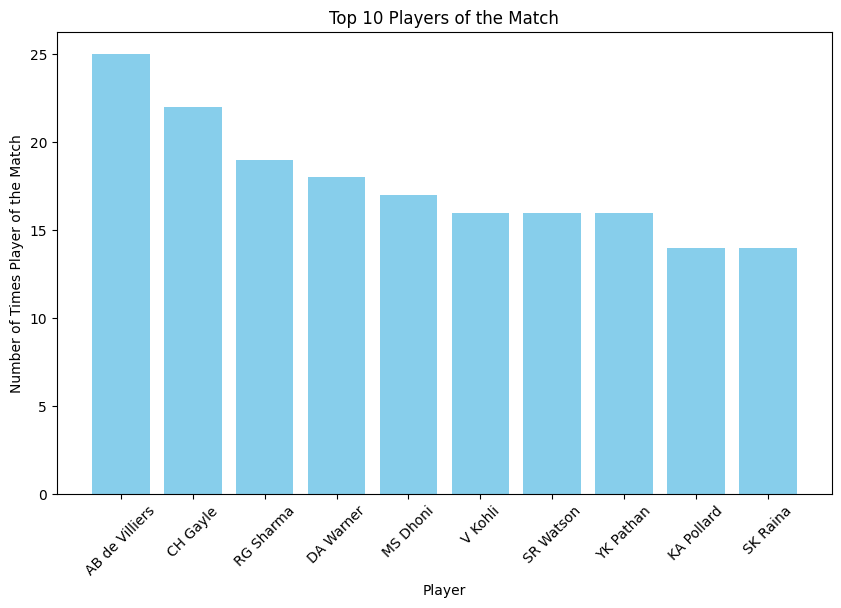

In [28]:
import matplotlib.pyplot as plt

player_counts = match_info_data["player_of_match"].value_counts().reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(player_counts['player_of_match'][:10], player_counts['count'][:10], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Number of Times Player of the Match')
plt.title('Top 10 Players of the Match')
plt.xticks(rotation=45)
plt.show()


AB de Villiers has the highest amount of man of the match awards.

### [E] Venue Analysis:




Which venue has hosted the most number of matches?

In [29]:
import plotly.graph_objs as go
import plotly.io as pio

# Assuming match_info_data is your DataFrame containing the venue data
venue_counts = match_info_data["venue"].value_counts().reset_index()

# Create a bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=venue_counts['venue'][:10],  # Venue names
    y=venue_counts['count'][:10],  # Number of times each venue has hosted IPL matches
    marker_color='red'  # Color of the bars
))

# Update layout
fig.update_layout(
    title='Top 10 Venues of IPL',
    xaxis=dict(title='Venues'),
    yaxis=dict(title='Hosted IPL Matches'),
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the interactive plot
pio.show(fig)


Are there any venues where teams tend to perform better/worse?

In [30]:
# Calculate the total number of matches played at each venue
venue_match_counts = match_info_data['venue'].value_counts()

# Create an empty DataFrame to store win percentages
venue_win_percentages = pd.DataFrame(index=match_info_data['venue'].unique(), columns=match_info_data['team1'].unique())

# Calculate the number of matches won by each team at each venue
for venue in venue_win_percentages.index:
    venue_matches = match_info_data[match_info_data['venue'] == venue]
    for team in venue_win_percentages.columns:
        venue_win_percentages.at[venue, team] = venue_matches[(venue_matches['winner'] == team)].shape[0]

# Calculate win percentages
for venue in venue_win_percentages.index:
    venue_win_percentages.loc[venue] = venue_win_percentages.loc[venue] / venue_match_counts[venue] * 100

# Analyze the win percentages to identify venues where teams tend to perform better or worse
print("Win percentages at different venues:")
print("-"*70)
venue_win_percentages


Win percentages at different venues:
----------------------------------------------------------------------


,Gujarat Titans,Mumbai Indians,Chennai Super Kings,Sunrisers Hyderabad,Royal Challengers Bangalore,Lucknow Super Giants,Punjab Kings,Delhi Capitals,Kolkata Knight Riders,Rajasthan Royals,Kings XI Punjab,Delhi Daredevils,Rising Pune Supergiant,Gujarat Lions,Rising Pune Supergiants,Pune Warriors,Deccan Chargers,Kochi Tuskers Kerala
"Narendra Modi Stadium, Ahmedabad",37.5,0.0,6.25,0.0,6.25,0.0,6.25,18.75,12.5,12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"MA Chidambaram Stadium, Chepauk, Chennai",0.0,15.789474,26.315789,5.263158,15.789474,0.0,10.526316,5.263158,10.526316,5.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Wankhede Stadium, Mumbai",7.894737,18.421053,13.157895,2.631579,13.157895,5.263158,10.526316,7.894737,7.894737,13.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"M Chinnaswamy Stadium, Bengaluru",14.285714,0.0,14.285714,0.0,42.857143,14.285714,0.0,0.0,14.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Eden Gardens, Kolkata",22.222222,0.0,11.111111,11.111111,11.111111,11.111111,0.0,0.0,22.222222,11.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Arun Jaitley Stadium, Delhi",9.090909,27.272727,18.181818,9.090909,0.0,0.0,9.090909,18.181818,0.0,9.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Himachal Pradesh Cricket Association Stadium, Dharamsala",0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",0.0,14.285714,0.0,14.285714,14.285714,14.285714,0.0,14.285714,14.285714,14.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",14.285714,0.0,0.0,0.0,14.285714,42.857143,14.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Sawai Mansingh Stadium, Jaipur",20.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


How does the average winning margin vary across different venues?

In [31]:
venue_avg_win_margin = match_info_data.groupby('venue')[['win_by_runs', 'win_by_wickets']].mean()

# Print the result
print("Average Winning Margin Across Different Venues:")
print("-"*70)
venue_avg_win_margin

Average Winning Margin Across Different Venues:
----------------------------------------------------------------------


,win_by_runs,win_by_wickets
venue,,
Arun Jaitley Stadium,11.714286,2.500000
"Arun Jaitley Stadium, Delhi",15.636364,3.727273
Barabati Stadium,10.428571,2.857143
"Barsapara Cricket Stadium, Guwahati",31.000000,0.000000
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",11.428571,1.000000
Brabourne Stadium,13.600000,2.500000
"Brabourne Stadium, Mumbai",13.352941,3.352941
Buffalo Park,29.000000,2.333333
De Beers Diamond Oval,17.666667,3.333333


### [F] Temporal Analysis:



How does the number of matches played vary across different seasons?



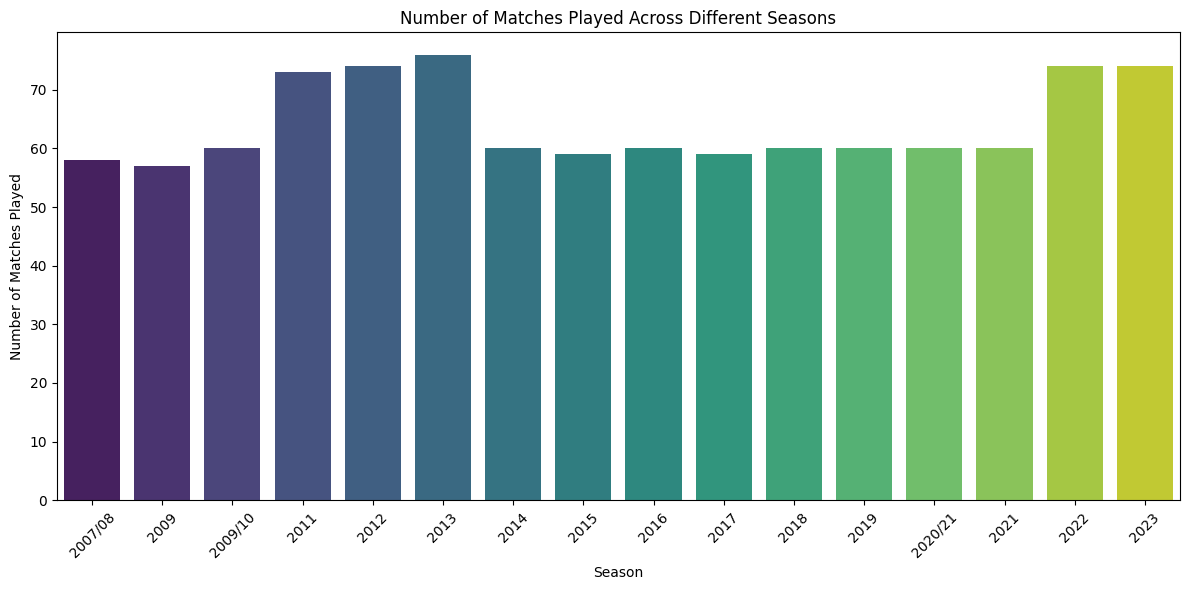

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming match_info_data is your DataFrame containing the match data
# Assuming you have already loaded your data into a DataFrame called match_info_data

# Count the number of matches played in each season
matches_per_season = match_info_data['season'].value_counts().reset_index().rename(columns={'season': 'Season', 'count': 'Matches'})
matches_per_season = matches_per_season.sort_values(by='Season')
# Plotting the graph using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Matches', data=matches_per_season, palette='viridis')
plt.title('Number of Matches Played Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Is there any trend in the number of matches affected by the Duckworth-Lewis method over the years?

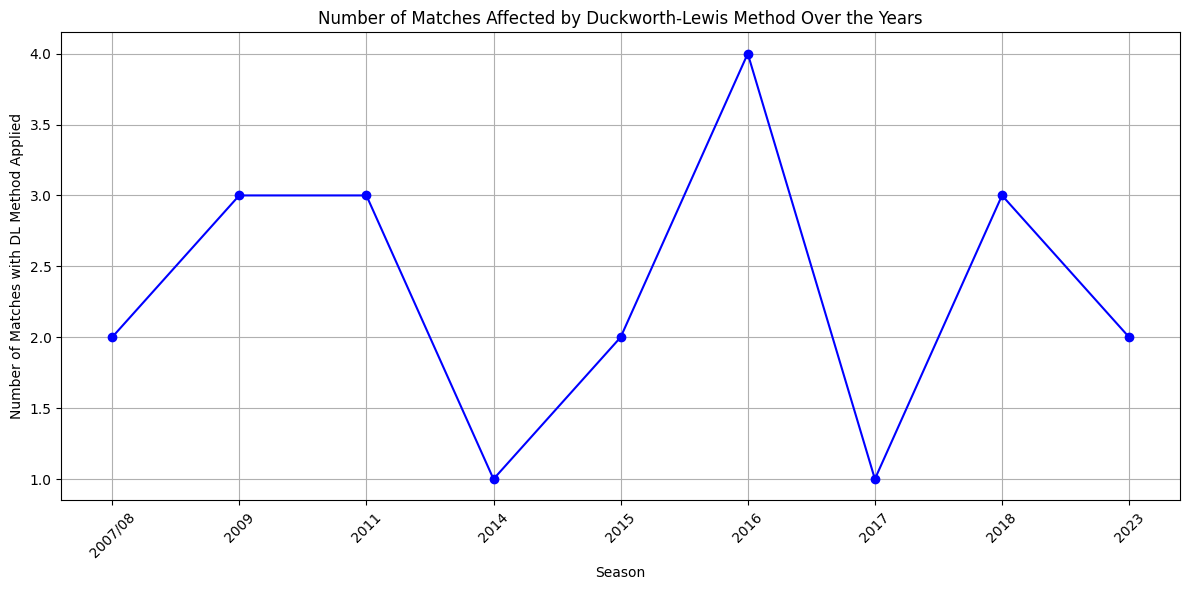

In [33]:
import matplotlib.pyplot as plt
# Filter matches with the Duckworth-Lewis method applied
dl_matches = match_info_data[match_info_data['dl_applied'] == 1]

# Count the number of matches with DL method applied in each season
dl_matches_per_season = dl_matches['season'].value_counts().sort_index()

# Plotting the graph using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(dl_matches_per_season.index, dl_matches_per_season.values, marker='o', color='blue', linestyle='-')
plt.title('Number of Matches Affected by Duckworth-Lewis Method Over the Years')
plt.xlabel('Season')
plt.ylabel('Number of Matches with DL Method Applied')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### [G] Umpire Analysis:

Who are the most frequent umpires in the dataset?

In [34]:
all_umpires = pd.concat([match_info_data['umpire1'], match_info_data['umpire2']], ignore_index=True).reset_index()
umpire_counts = all_umpires[0].value_counts().reset_index().rename(columns={0: 'Umpires', "count": 'Matches'}).head()
umpire_counts 

,Umpires,Matches
0,S Ravi,131
1,AK Chaudhary,121
2,Nitin Menon,94
3,HDPK Dharmasena,94
4,C Shamshuddin,88


Is there any correlation between specific umpires and match outcomes?

In [35]:
import pandas as pd

# Assuming match_info_data is your DataFrame containing the match data
# Assuming you have already loaded your data into a DataFrame called match_info_data

# Create a contingency table
umpire_outcome_table = pd.crosstab(match_info_data['umpire1'], match_info_data['winner'])

# Perform chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(umpire_outcome_table)


# Format p-value for readability
formatted_p_value = "{:.2e}".format(p)

# Print the formatted p-value
print("p-value:", formatted_p_value)

p-value: 1.58e-09


### [H] Miscellaneous:

How does the distribution of winning margins (runs/wickets) look like?



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



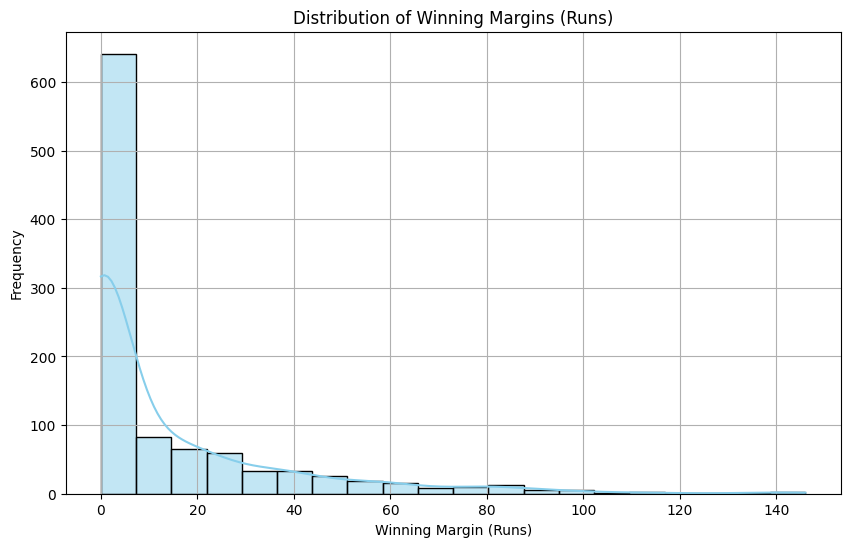

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



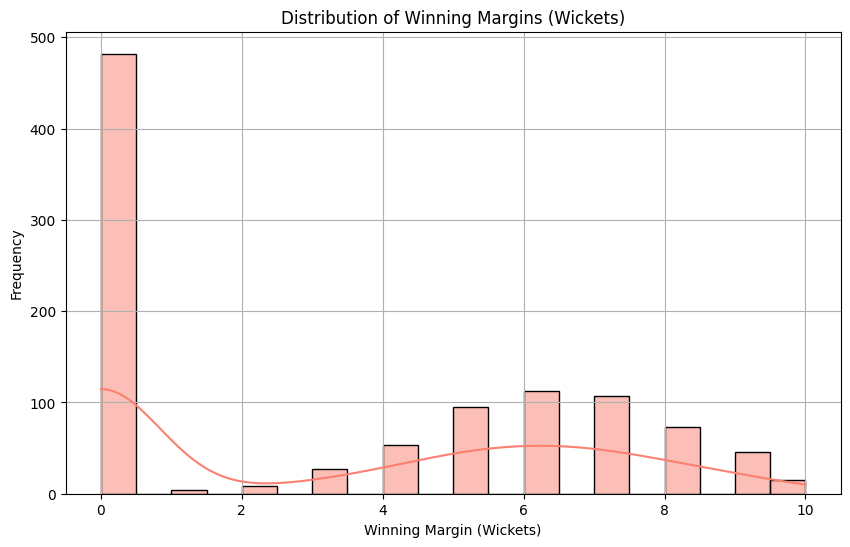

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out matches where there was no result
valid_matches = match_info_data[match_info_data['result'] != 'no result']

# Plotting the distribution of winning margins in terms of runs
plt.figure(figsize=(10, 6))
sns.histplot(valid_matches['win_by_runs'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Winning Margins (Runs)')
plt.xlabel('Winning Margin (Runs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of winning margins in terms of wickets
plt.figure(figsize=(10, 6))
sns.histplot(valid_matches['win_by_wickets'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Winning Margins (Wickets)')
plt.xlabel('Winning Margin (Wickets)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## (2) DATASET 2 ANALYSIS : IPL ALL MATCHES BALL-BY-BALL ANALYSIS

Match Analysis:

How many matches are included in the dataset?
How many seasons are covered in the dataset?
What is the distribution of matches across seasons?
What is the distribution of matches across venues?
Batting Analysis:

Which teams have scored the highest and lowest total runs?
What is the average runs scored by each team per match?
Who are the top run-scorers in the IPL?
How does the distribution of runs scored vary across innings?
What is the distribution of runs scored by each batting team?
Bowling Analysis:

Which teams have conceded the most and least total runs?
What is the average runs conceded by each team per match?
Who are the top wicket-takers in the IPL?
How does the distribution of wickets taken vary across innings?
What is the distribution of runs conceded by each bowling team?
Player Performance Analysis:

Who are the most consistent batsmen in terms of scoring runs?
Who are the most economical bowlers in terms of conceding runs?
Which players have the highest strike rates?
How does player performance vary across different seasons?
Match Outcome Analysis:

What are the most common types of dismissals (wicket_type)?
How many matches were won by batting first and batting second?
Is there a correlation between winning the toss and winning the match?
How does the margin of victory vary across matches?
Inning-wise Analysis:

How does the scoring rate vary across different innings?
What is the average number of runs scored in powerplays (first 6 overs)?
How does the distribution of runs scored change in the middle and death overs?
Extras Analysis:

What is the distribution of different types of extras (wides, no balls, byes, leg byes)?
How do extras contribute to the total runs scored in matches?
Over-wise Analysis:

How does the distribution of runs scored vary across different overs?
Which overs are the most economical for bowlers?
Partnership Analysis:

How do partnership runs contribute to the team's total score?
What is the average partnership score for different wickets?
Match Situation Analysis:

How does the scoring rate change in different match situations (e.g., chasing a target, setting a target)?